Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

     |████████████████████████████████| 81kB 3.2MB/s 
     |████████████████████████████████| 245kB 4.5MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 61kB 4.4MB/s 
     |████████████████████████████████| 1.1MB 28.5MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 3.2MB 44.2MB/s 
     |████████████████████████████████| 296kB 44.7MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=e2c4aaa9b32028455ed3de624c5689cbde74e6674093b1df5d878872067533ec
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=1f2df4273672769d51763cefe8e079793c1f3b873ef1d5511ad3ca184efab3d4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: goog

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [10]:
import pandas as pd

df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv'),
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv'))
# YOUR CODE HERE
df = df.set_index('id')

df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


**Test 2**

In [5]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [11]:
target = 'status_group'

# YOUR CODE HERE
X = df.drop(labels = 'status_group', axis = 1) # Set up feature matrix by dropping target column
y = df[target] # Set up target vector

**Test 3**

In [12]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [14]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2) # Set up training set (80%) and validation set (20%)

**Test 4**

In [15]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [21]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

majority_class = y_train.mode() # Determine the majority class for y_train using Mode

y_pred = [majority_class] * len(y_train) # Assign the majority class to y_pred as as list of the same length as y_train

baseline_acc = accuracy_score(y_train, y_pred) # Calculate the accuracy score

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5426767676767676


**Task 5**

In [19]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [30]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
# Make a pipeline using Ordinal Encoder to transform categorical features,
# SimpleImputer to impute any missing values, and a DecisionTree Classifier as the estimator

model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(min_samples_leaf = 10)
)

model.fit(X_train, y_train);

**Test 6**

In [25]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [48]:
# YOUR CODE HERE

training_acc = model.score(X_train, y_train) # Calculate the accuracy score for the training set
validation_acc = model.score(X_val, y_val) # Calculate the accuracy score for the validation set

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.8470538720538721
Validation Accuracy: 0.7558922558922558


**Test 7**

In [32]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [35]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id')
# YOUR CODE HERE
y_pred_test = model.predict(X_test) # Calculate predicted values by the Decision Tree model for the testing set
submission = pd.DataFrame(data = y_pred_test, index = X_test.index, columns = ['status_group']) # Assign the preidcted values to a dataframe
submission.head()

,status_group
id,
50785,functional needs repair
51630,functional
17168,functional
45559,non functional
49871,functional


**Test 8**

In [36]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [49]:
# YOUR CODE HERE
submission.to_csv('Ivan_Mihailov_Module1_Kaggle_Submission')

## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

Text(0.5, 1.0, 'Top 10 Most Important Decision Tree Model Features')

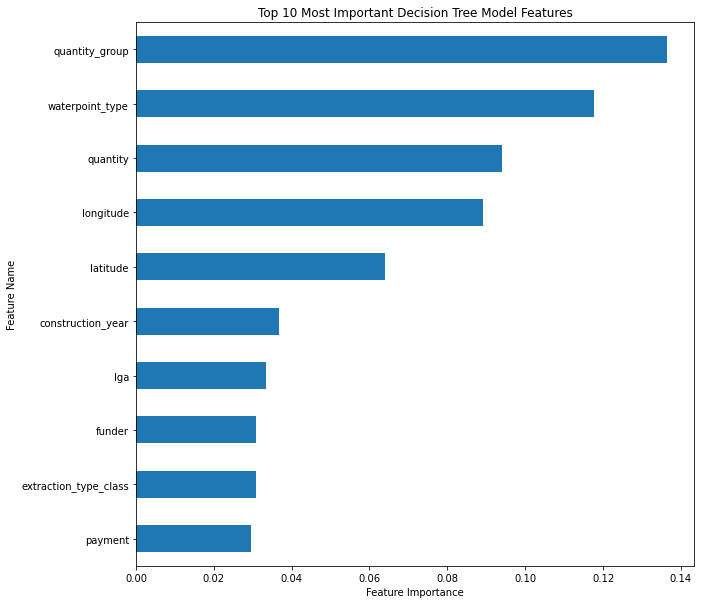

In [52]:
import matplotlib.pyplot as plt

# YOUR CODE HERE

est = model.named_steps['decisiontreeclassifier'] # Isolate estimator from the model pipeline
encoder = model.named_steps['ordinalencoder'] # Isolate the encoder from the model pipeline
encoded_columns = encoder.transform(X_test).columns # Transform the columns using the Ordinal Encoder and assign the column names

imp_features = pd.Series(est.feature_importances_, encoded_columns) # Create a pandas series using the feature importances and the encoded column names used in the model
plt.figure(figsize = (10, 10))
imp_features.sort_values(key=abs).tail(10).plot.barh()# Set up horizontal bar chart of the Top 10 Most Important Model Features
plt.xlabel('Feature Importance') # Set up name for x-axis
plt.ylabel('Feature Name') # Set up name for y-axis
plt.title('Top 10 Most Important Decision Tree Model Features') # Set up table name